In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from datetime import datetime
from sklearn.model_selection import train_test_split
import gc
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import pickle
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from xgboost import plot_importance
from sklearn.tree import DecisionTreeRegressor

C:\Users\satyam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [34]:
class ml_project:
    def __init__(self):
        pass
    def preprocess_data(self,tdata,store_data):
        data=pd.merge(tdata,store_data,on="Store")
        data.fillna(0,inplace=True)
        data['Promo2SinceWeek'] = data.Promo2SinceWeek.astype(int)
        data['Promo2SinceYear'] = data.Promo2SinceYear.astype(int)
        data['PromoInterval'] = data.PromoInterval.astype(str)
        data['CompetitionOpenSinceMonth'] = data.CompetitionOpenSinceMonth.astype(int)
        data['CompetitionOpenSinceYear'] = data.CompetitionOpenSinceYear.astype(int)
        assortment_mapping={'a':0,'b':1,'c':2}
        store_mapping={'a':0,'b':1,'c':2,'d':4}
        data.replace(assortment_mapping,inplace=True)
        data.replace(store_mapping,inplace=True)
    
        data['Date'] = pd.to_datetime(data['Date'])
    
        data['Year'] = data.Date.dt.year
        data['Month'] = data.Date.dt.month
        data['Day'] = data.Date.dt.day
        data['DayOfWeek'] = data.Date.dt.dayofweek
        data['WeekOfYear'] = data.Date.dt.weekofyear
        #calculation of time when the competition has opened in months
        data['CompetitionOpenMonths'] = 12 * (data.Year - data.CompetitionOpenSinceYear) + (data.Month - data.CompetitionOpenSinceMonth)
        data['CompetitionOpenMonths'] = data.CompetitionOpenMonths.apply(lambda x: x if x > 0 else 0)
        data['PromoOpen'] = 12 * (data.Year - data.Promo2SinceYear) + (data.WeekOfYear - data.Promo2SinceWeek) / 4.0
        data['PromoOpen'] = data.PromoOpen.apply(lambda x: x if x > 0 else 0)
    
        month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
        data['monthStr'] = data.Month.map(month2str)
        data['IsPromoMonth'] = 0
        for interval in data.PromoInterval.unique():
            if interval!="":
                for month in interval.split(","):
                    data.loc[(data.monthStr == month) & (data.PromoInterval == interval), 'IsPromoMonth'] = 1
        data['Date'] =  pd.to_datetime(train_data['Date'], format='%Y-%m-%d')
        data['DayOfYear']=data['Date'].dt.dayofyear
        data.loc[data["Promo2"]==0,"PromoOpen"]=0
        data=data.loc[data["Open"]==1]
        #data=data.drop(columns=['Unnamed: 0'])
        return data
    def set_train_data(self,train_data):
        self.train_data=train_data
    def set_test_data(self,test_data):
        self.test_data=test_data
    def set_features(self,features):
        self.features=features
    def train_random_forest_regressor(self):
        gc.collect()
        model=RandomForestRegressor(max_depth=50,max_features='auto',min_samples_leaf=4,min_samples_split=10,n_estimators=400)
        x_train,x_val,y_train,y_val=train_test_split(self.train_data[features],self.train_data[['Sales']],random_state=200,test_size=0.2)
        model.fit(x_train,y_train)
        self.random_forest_regressor=model
    def train_random_forest_regressor_default(self):
        model=RandomForestRegressor()
        gc.collect()
        x_train,x_val,y_train,y_val=train_test_split(self.train_data[features],self.train_data[['Sales']],random_state=200,test_size=0.2)
        model.fit(x_train,y_train)
        self.random_forest_regressor_default=model
    def train_linear_regressor(self):
        x_train,x_val,y_train,y_val=train_test_split(self.train_data[features],self.train_data[['Sales']],random_state=200,test_size=0.2)
        model=LinearRegression()
        gc.collect()
        model.fit(x_train,y_train)
        self.linear_regressor=model
    def train_xgboost_regressor(self):
        x_train,x_val,y_train,y_val=train_test_split(train_data[features],train_data[['Sales']],random_state=200,test_size=0.2)
        model=xgb.XGBRegressor(objective="reg:linear",booster="gbtree", eta=0.03,max_depth=10, subsample=0.9, 
                  colsample_bytree=0.7,silent=1,seed=10)
        gc.collect()
        model.fit(x_train,y_train)
        self.xgb_regressor=model
    def train_decision_tree_regressor(self):
        x_train,x_val,y_train,y_val=train_test_split(train_data[features],train_data[['Sales']],random_state=200,test_size=0.2)
        model = DecisionTreeRegressor(max_depth=20)
        gc.collect()
        model.fit(x_train,y_train)
        self.decision_tree_regressor=model
    def set_random_forest_regressor(self,model):
        self.random_forest_regressor=model
    def set_random_forest_regressor_default(self,model):
        self.random_forest_regressor_default=model
    def set_linear_regressor(self,model):
        self.linear_regressor=model
    def set_xgb_regressor(self,model):
        self.xgb_regressor=model
    def set_decision_tree_regressor(self,model):
        self.decision_tree_regressor=model
    def get_random_forest_validation_score(self):
        x_train,x_val,y_train,y_val=train_test_split(self.train_data[features],self.train_data[['Sales']],random_state=200,test_size=0.2)
        predictions = self.random_forest_regressor.predict(x_val)
        rmse = sqrt(mean_squared_error(y_val,predictions))
        return rmse
    def get_random_forest_validation_score_default(self):
        x_train,x_val,y_train,y_val=train_test_split(self.train_data[features],self.train_data[['Sales']],random_state=200,test_size=0.2)
        predictions = self.random_forest_regressor_default.predict(x_val)
        rmse = sqrt(mean_squared_error(y_val,predictions))
        return rmse
    def get_linear_regressor_validation_score(self):
        x_train,x_val,y_train,y_val=train_test_split(self.train_data[features],self.train_data[['Sales']],random_state=200,test_size=0.2)
        LinearModelPredictions = self.linear_regressor.predict(x_val)
        rmse = sqrt(mean_squared_error(y_val, LinearModelPredictions))
        return rmse
    def get_xgb_regressor_validation_score(self):
        x_train,x_val,y_train,y_val=train_test_split(self.train_data[features],self.train_data[['Sales']],random_state=200,test_size=0.2)
        predictions = self.xgb_regressor.predict(x_val)
        rmse = sqrt(mean_squared_error(y_val, predictions))
        return rmse
    def get_decision_tree_regressor_validation_score(self):
        x_train,x_val,y_train,y_val=train_test_split(self.train_data[features],self.train_data[['Sales']],random_state=200,test_size=0.2)
        predictions = self.decision_tree_regressor.predict(x_val)
        rmse = sqrt(mean_squared_error(y_val, predictions))
        return rmse
    def pickle_decision_tree_regressor(self):
        filename="decision_tree_regressor.sav"
        pickle.dump(self.linear_regressor,open(filename,"wb"))
    def pickle_linear_regressor(self):
        filename="linear_regressor.sav"
        pickle.dump(self.linear_regressor,open(filename,"wb"))
    def pickle_xgb_regressor(self):
        filename="xgb_regressor.sav"
        pickle.dump(self.xgb_regressor,open(filename,"wb"))
    def pickle_random_forest_regressor(self):
        filename="random_forest_regressor.sav"
        pickle.dump(self.random_forest_regressor,open(filename,"wb"))
    def pickle_random_forest_regressor_default(self):
        filename="random_forest_regressor_default.sav"
        pickle.dump(self.random_forest_regressor_default,open(filename,"wb"))
    def plot_weights_random_forest_regressor(self):
        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0] = 20
        fig_size[1] = 10
        plt.rcParams["figure.figsize"] = fig_size
        height=self.random_forest_regressor.feature_importances_
        bars=self.features
        y_pos = np.arange(len(bars))
        l=[1 for i in range(11)]
        li=np.array(l)
        plt.bar(y_pos,height)
        plt.xticks(y_pos, bars,rotation=90)
        plt.show()
    def plot_weights_random_forest_regressor_default(self):
        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0] = 20
        fig_size[1] = 10
        plt.rcParams["figure.figsize"] = fig_size
        height=self.random_forest_regressor_default.feature_importances_
        bars=self.features
        y_pos = np.arange(len(bars))
        l=[1 for i in range(11)]
        li=np.array(l)
        plt.bar(y_pos,height)
        plt.xticks(y_pos, bars,rotation=90)
        plt.show()
    def plot_weights_linear_regressor(self):
        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0] = 20
        fig_size[1] = 10
        plt.rcParams["figure.figsize"] = fig_size
        height=self.linear_regressor.coef_[0]
        bars=self.features
        y_pos = np.arange(len(bars))
        l=[1 for i in range(11)]
        li=np.array(l)
        plt.bar(y_pos,height)
        plt.ylim(top=500)  # adjust the top leaving bottom unchanged
        plt.ylim(bottom=0)
        plt.xticks(y_pos, bars,rotation=90)
        plt.show()
    def plot_weights_xgb_regressor(self):
        plot_importance(self.xgb_regressor)
    def plot_weights_decision_tree_regressor(self):
        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0] = 20
        fig_size[1] = 10
        plt.rcParams["figure.figsize"] = fig_size
        height=self.decision_tree_regressor.feature_importances_
        bars=self.features
        y_pos = np.arange(len(bars))
        l=[1 for i in range(11)]
        li=np.array(l)
        plt.bar(y_pos,height)
        plt.xticks(y_pos, bars,rotation=90)
        plt.show()
    

In [35]:
train_data=pd.read_csv('train.csv',low_memory=False)
test_data=pd.read_csv('test.csv',low_memory=False)
store_data=pd.read_csv('store.csv',low_memory=False)
obj=ml_project()
train_data=obj.preprocess_data(train_data,store_data)
test_data=obj.preprocess_data(test_data,store_data)
train_data.to_csv("train_data_processed.csv")
test_data.to_csv("test_data_processed.csv")

0
1
2
3
4
5
6
7
8
9
10
11
12
0
1
2
3
4
5
6
7
8
9
10
11
12


In [36]:
len(train_data)

830972

In [28]:
train_data=pd.read_csv("train_data_processed.csv")
test_data=pd.read_csv("test_data_processed.csv")

1001599


In [5]:
#features=['Customers','Store','Promo','SchoolHoliday','StateHoliday','StoreType','Assortment'
#          ,'CompetitionOpenMonths','CompetitionDistance','DayOfWeek','IsPromoMonth']

features=['Store','Customers','Promo','StoreType','Assortment','CompetitionOpenMonths',
            'CompetitionDistance','DayOfWeek','Promo2','PromoOpen']

In [21]:
obj=ml_project()
obj.set_test_data(test_data)
obj.set_train_data(train_data)
obj.set_features(features)

1452.1986615416822


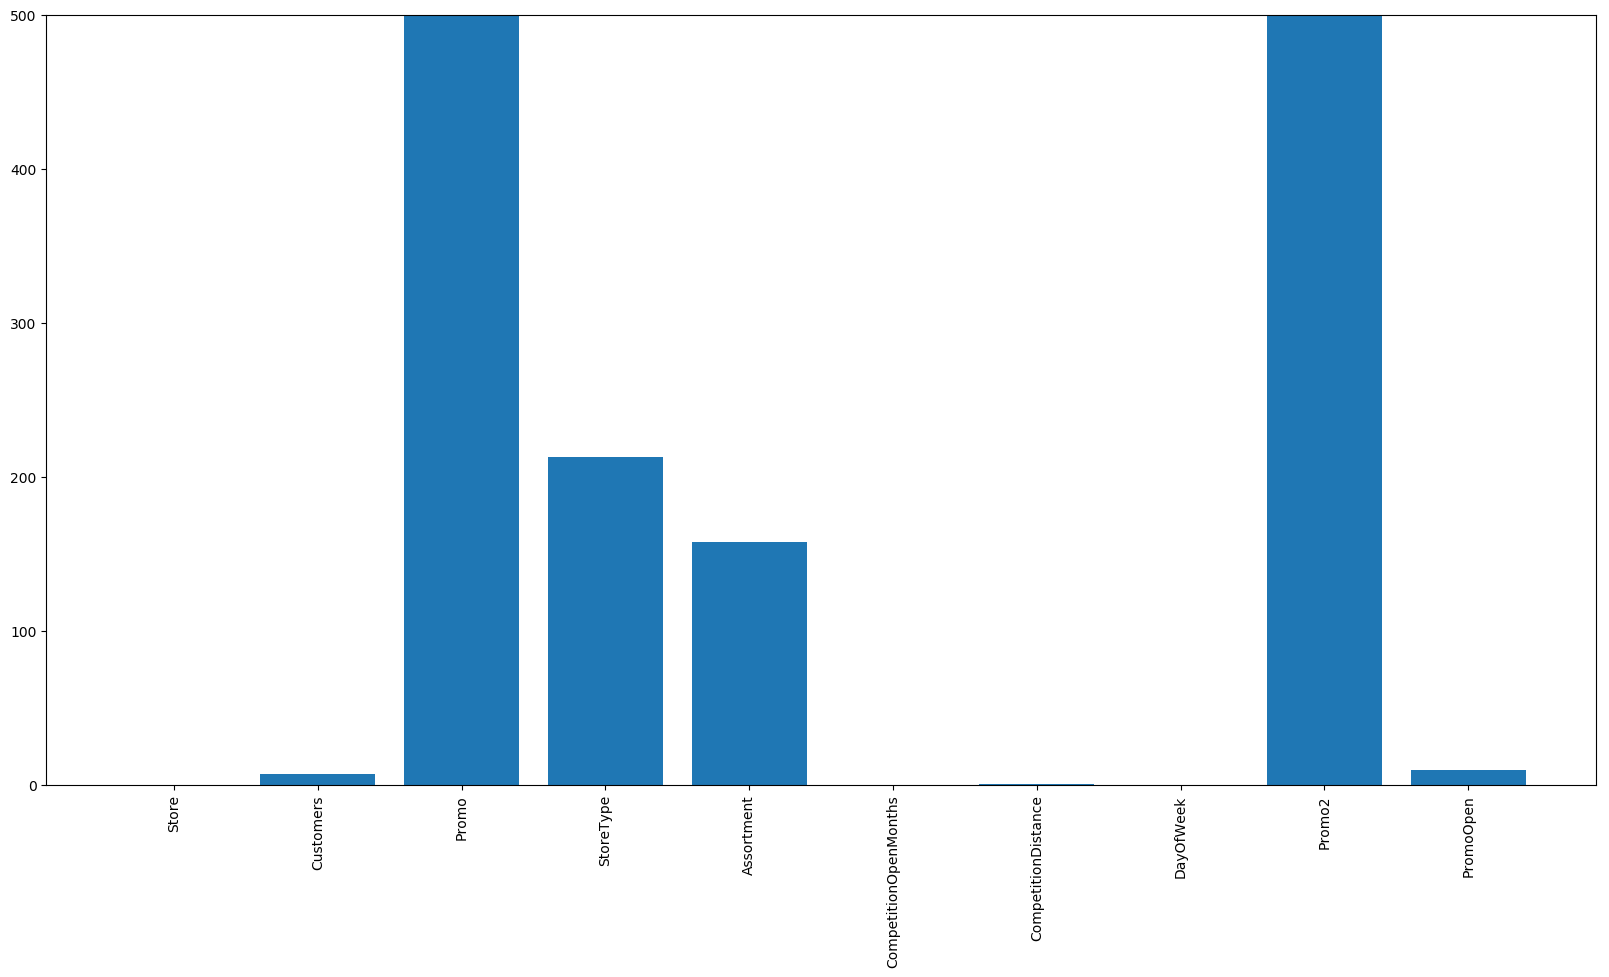

In [34]:
obj.train_linear_regressor()
obj.pickle_linear_regressor()

614.3342367308037


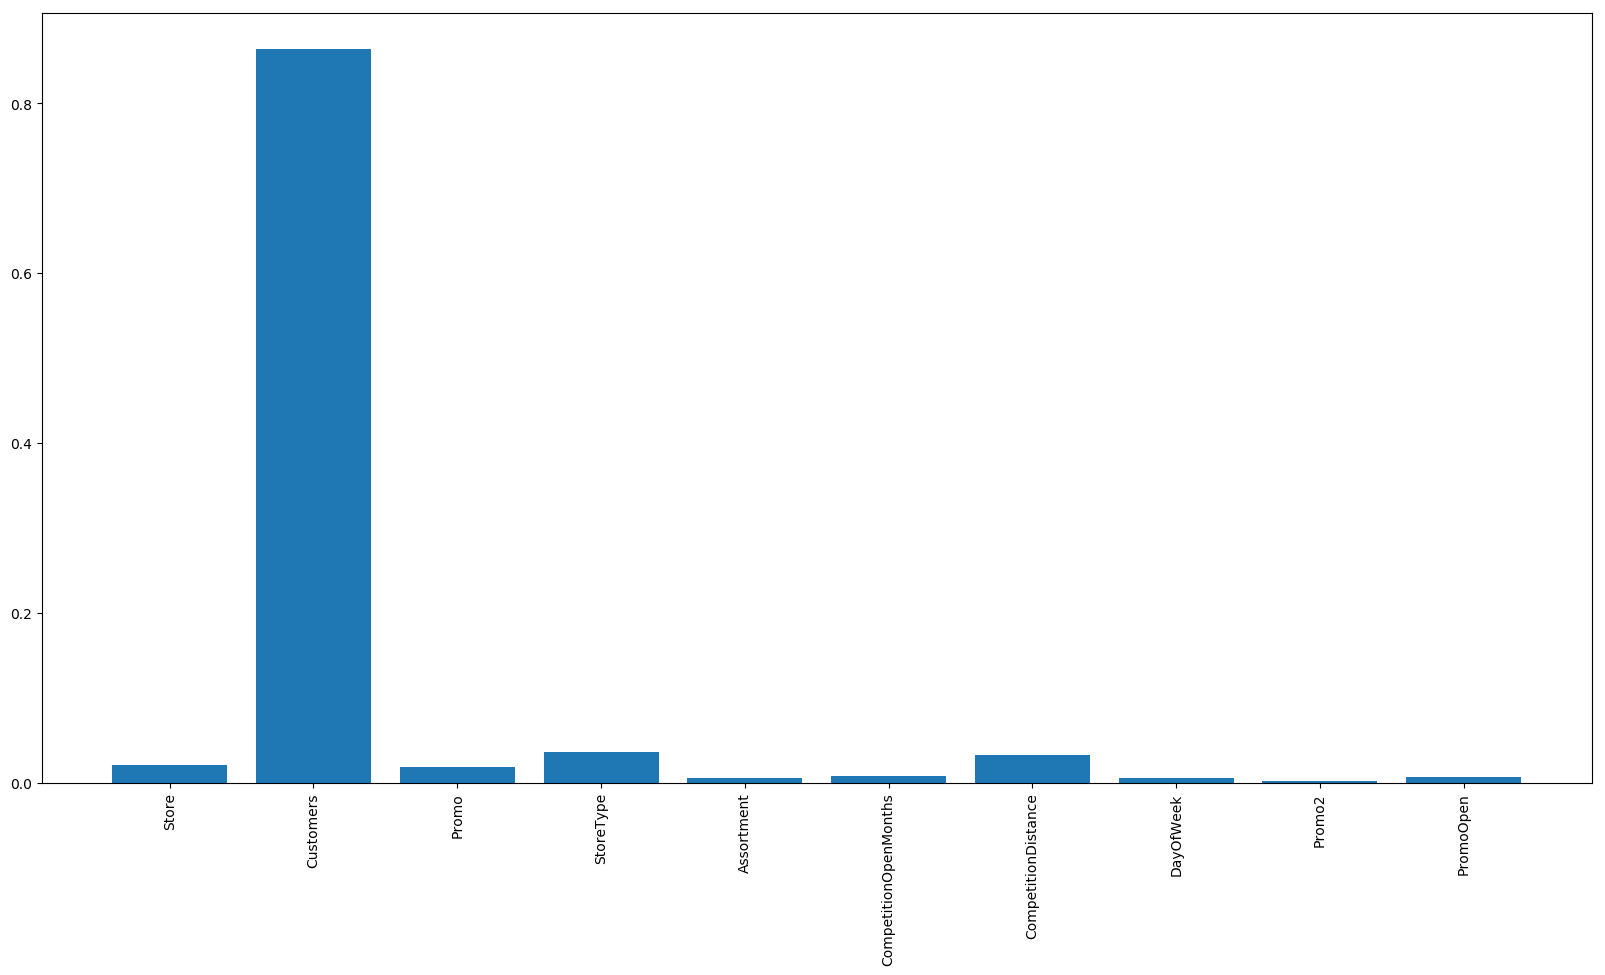

In [35]:
obj.train_decision_tree_regressor()
obj.pickle_decision_tree_regressor()

C:\Users\satyam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:55: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


<bound method ml_project.get_random_forest_validation_score of <__main__.ml_project object at 0x000001D1003EE320>>


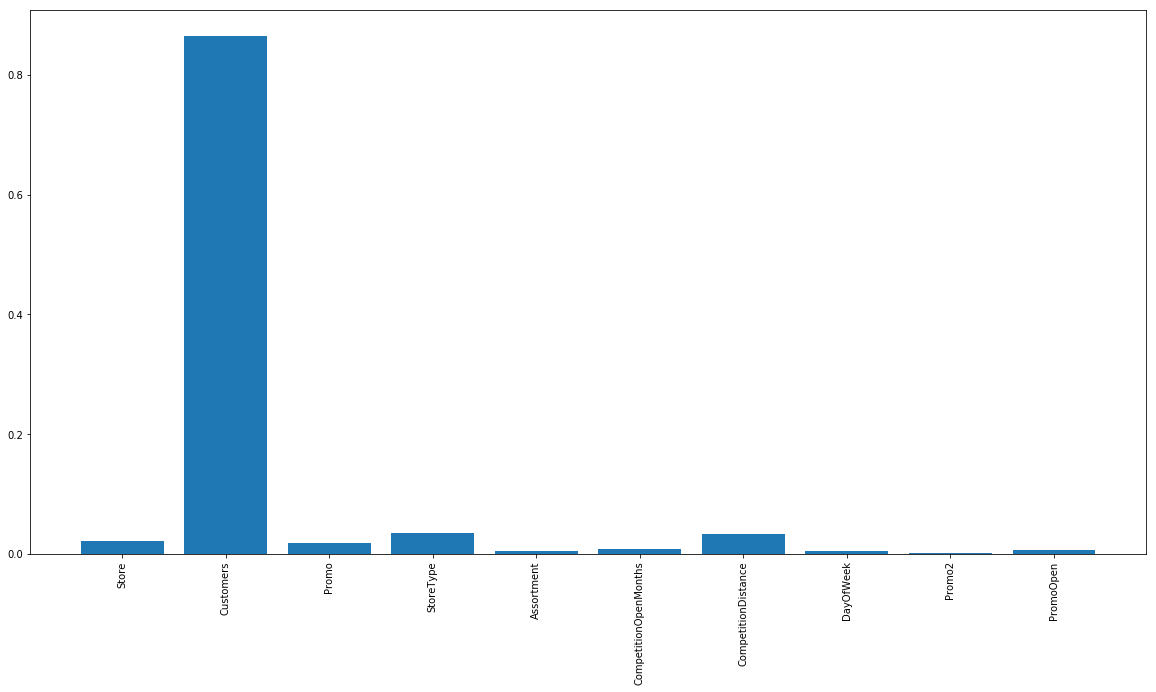

In [9]:
obj.train_random_forest_regressor()
obj.pickle_random_forest_regressor()

C:\Users\satyam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:62: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


<bound method ml_project.get_random_forest_validation_score_default of <__main__.ml_project object at 0x000001D1009F9240>>


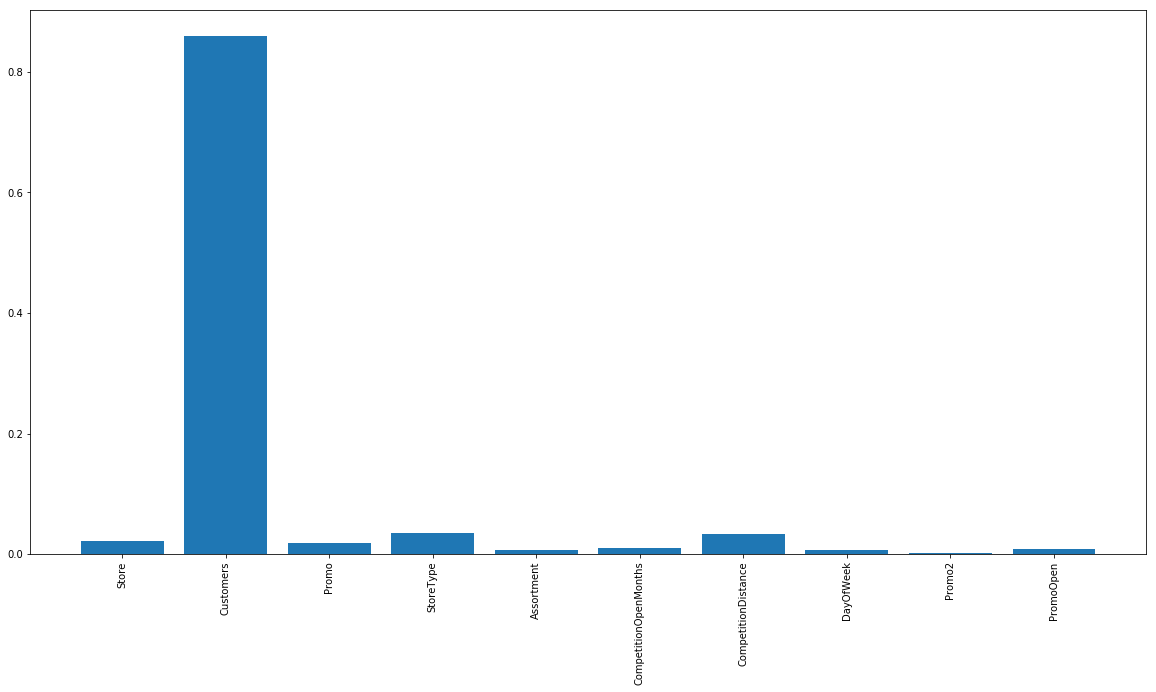

In [23]:
obj.train_random_forest_regressor_default()
obj.pickle_random_forest_regressor_default()

488.7280679899904


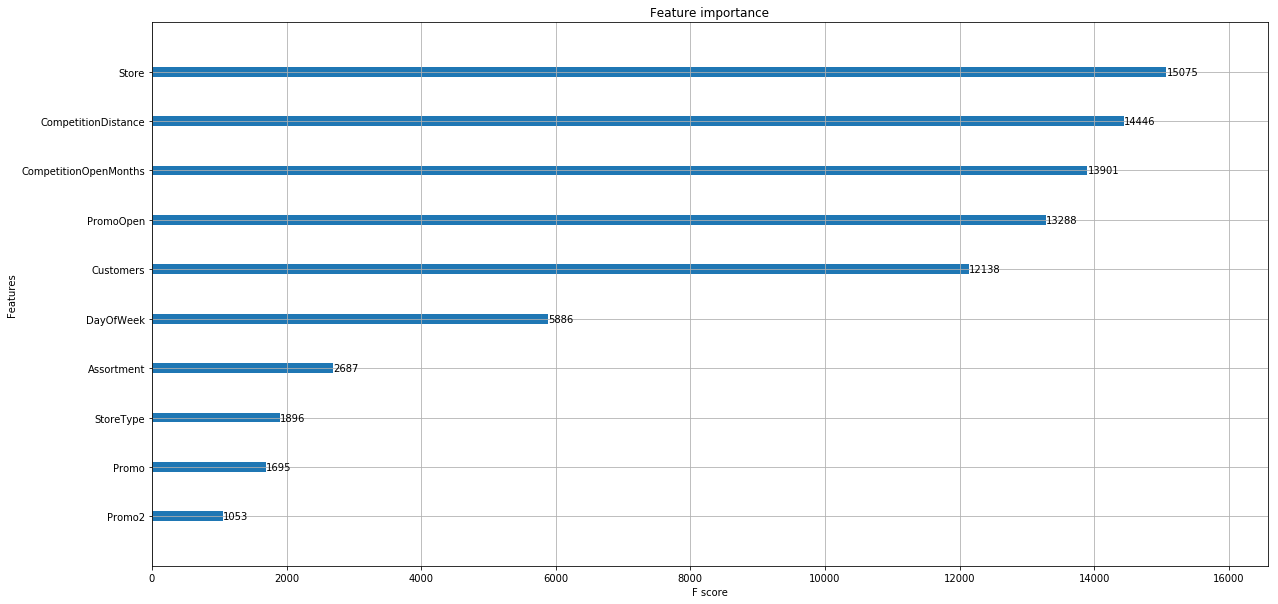

In [22]:
obj.train_xgboost_regressor()
obj.pickle_xgb_regressor()